In [1]:
import os
import tensorflow as tf
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import shutil
from PIL import Image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from shutil import copyfile
from os import getcwd

In [2]:
os.mkdir(f"{getcwd()}/data")
base_dir = f"{getcwd()}/data"

os.mkdir(os.path.join(base_dir,"testing"))
os.mkdir(os.path.join(base_dir,"training"))

base_training = os.path.join(base_dir,"training")
base_testing = os.path.join(base_dir,"testing")

os.mkdir(os.path.join(base_training,"angry"))
os.mkdir(os.path.join(base_training,"disgust"))
os.mkdir(os.path.join(base_training,"fear"))
os.mkdir(os.path.join(base_training,"happy"))
os.mkdir(os.path.join(base_training,"neutral"))
os.mkdir(os.path.join(base_training,"sad"))
os.mkdir(os.path.join(base_training,"surprise"))

os.mkdir(os.path.join(base_testing,"angry"))
os.mkdir(os.path.join(base_testing,"disgust"))
os.mkdir(os.path.join(base_testing,"fear"))
os.mkdir(os.path.join(base_testing,"happy"))
os.mkdir(os.path.join(base_testing,"neutral"))
os.mkdir(os.path.join(base_testing,"sad"))
os.mkdir(os.path.join(base_testing,"surprise"))

In [3]:
csv_file = f"{getcwd()}/fer2013.csv"   
df = pd.read_csv(csv_file)
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [4]:
#parsing CSV Files, and transforming pixels column into 2 by 2 int np array
train = df[["emotion", "pixels"]][df["Usage"] == "Training"]
train['pixels'] = train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
x_train = np.vstack(train['pixels'].values)
y_train = np.array(train["emotion"])

test = df[["emotion", "pixels"]][df["Usage"]=="PublicTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_preval = np.vstack(test["pixels"].values)
y_preval = np.array(test["emotion"])

val = df[["emotion", "pixels"]][df["Usage"]=="PrivateTest"]
val["pixels"] = val["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_val = np.vstack(val["pixels"].values)
y_val = np.array(val["emotion"])

x_test = np.concatenate((x_val, x_preval))
y_test = np.concatenate((y_val, y_preval))

x_train = x_train.reshape(-1, 48, 48)
x_test  = x_test.reshape(-1, 48, 48)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape) 

(28709, 48, 48)
(28709,)
(7178, 48, 48)
(7178,)


In [5]:
print(y_test[3589])
print(x_test[3589])

0
[[254. 254. 254. ...  16.   0. 161.]
 [254. 254. 254. ...  17.   0. 122.]
 [254. 254. 254. ...  26.   0. 114.]
 ...
 [ 66.  86.  99. ... 255. 252. 254.]
 [ 84.  92.  92. ... 236. 255. 255.]
 [ 93.  90.  85. ...  42. 129. 180.]]


In [6]:
# Converting 2D np array into image, and storing them in a separate folder for each classes
x_train_size = len(x_train)
try:
    # Change the current working Directory    
    os.chdir(f"{getcwd()}/data/training/")
except OSError:
     print("Can't change the Current Working Directory") 
        
# Looping through the entire traindataset
for x in range(0,x_train_size):
        if (y_train[x]==0).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/angry")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_train[x]==1).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/disgust")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_train[x]==2).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/fear")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")     
        elif (y_train[x]==3).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/happy")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")    
        elif (y_train[x]==4).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/neutral")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_train[x]==5).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/sad")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")    
        elif (y_train[x]==6).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/surprise")
                im = Image.fromarray(x_train[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")     
        try:
            # Change the current working Directory    
            os.chdir(f"{getcwd()}/..")
        except OSError:
            print("Can't change the Current Working Directory")  
try:
    # Change the current working Directory    
    os.chdir(f"{getcwd()}/..")
except OSError:
    print("Can't change the Current Working Directory")  


In [7]:
# Converting 2D np array into image, and storing them in a separate folder for each classes
x_test_size = len(x_test)
try:
    # Change the current working Directory    
    os.chdir(f"{getcwd()}/testing/")
except OSError:
     print("Can't change the Current Working DirectoryMaju")   
# Looping for the entire test data set
for x in range(0,x_test_size):
        if (y_test[x]==0).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/angry")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_test[x]==1).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/disgust")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_test[x]==2).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/fear")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")     
        elif (y_test[x]==3).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/happy")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")    
        elif (y_test[x]==4).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/neutral")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")   
        elif (y_test[x]==5).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/sad")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")    
        elif (y_test[x]==6).all() == True:
            try:
            # Change the current working Directory    
                os.chdir(f"{getcwd()}/surprise")
                im = Image.fromarray(x_test[x,:,:])
                im = im.convert("L")
                im.save(str(x)+"your_file.jpg")
            except OSError:
                print("Can't change the Current Working Directory")     
        try:
            # Change the current working Directory    
            os.chdir(f"{getcwd()}/..")
        except OSError:
            print("Can't change the Current Working DirectoryMundur")   
try:
    # Change the current working Directory    
    os.chdir(f"{getcwd()}/..")
except OSError:
    print("Can't change the Current Working Directory")  

In [8]:
# CNN Model with 4 layer of CNN.
opt = SGD(lr=0.001, momentum=0.9)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(48,48,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
for layer in model.layers:
    print(layer.output_shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         7

In [9]:
TRAINING_DIR = f"{getcwd()}/training/"
VALIDATION_DIR = f"{getcwd()}/testing/"

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                  TRAINING_DIR,  
                  target_size=(48, 48),  
                  batch_size=50,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = train_datagen.flow_from_directory(
                      VALIDATION_DIR,  
                      target_size=(48, 48), 
                      batch_size=50,
                      class_mode='categorical'
                     )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
#My model is still underfitting the data, needs more data to make it more accurate
history = model.fit(train_generator,
                              epochs=200,
                              verbose=1,
                              validation_data=validation_generator,
                              use_multiprocessing=True)

Epoch 1/200
575/575 [==============================] - 46s 81ms/step - loss: 1.8307 - accuracy: 0.2512 - val_loss: 1.8145 - val_accuracy: 0.2471
Epoch 2/200
575/575 [==============================] - 47s 81ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8110 - val_accuracy: 0.2471
Epoch 3/200
575/575 [==============================] - 47s 82ms/step - loss: 1.8064 - accuracy: 0.2513 - val_loss: 1.8062 - val_accuracy: 0.2471
Epoch 4/200
575/575 [==============================] - 47s 82ms/step - loss: 1.8015 - accuracy: 0.2516 - val_loss: 1.8026 - val_accuracy: 0.2467
Epoch 5/200
575/575 [==============================] - 47s 82ms/step - loss: 1.7954 - accuracy: 0.2541 - val_loss: 1.7935 - val_accuracy: 0.2501
Epoch 6/200
575/575 [==============================] - 47s 82ms/step - loss: 1.7887 - accuracy: 0.2551 - val_loss: 1.7892 - val_accuracy: 0.2509
Epoch 7/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7861 - accuracy: 0.2550 - val_loss: 1.7836 - val_ac

575/575 [==============================] - 47s 81ms/step - loss: 1.7809 - accuracy: 0.2582 - val_loss: 1.7800 - val_accuracy: 0.2552
Epoch 11/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7779 - accuracy: 0.2597 - val_loss: 1.7800 - val_accuracy: 0.2595
Epoch 12/200
575/575 [==============================] - 46s 80ms/step - loss: 1.7761 - accuracy: 0.2602 - val_loss: 1.7726 - val_accuracy: 0.2618
Epoch 13/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7737 - accuracy: 0.2620 - val_loss: 1.7760 - val_accuracy: 0.2634
Epoch 14/200
575/575 [==============================] - 46s 80ms/step - loss: 1.7728 - accuracy: 0.2638 - val_loss: 1.7721 - val_accuracy: 0.2661
Epoch 15/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7695 - accuracy: 0.2633 - val_loss: 1.7707 - val_accuracy: 0.2673
Epoch 16/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7706 - accuracy: 0.2637 - val_loss: 1.7683 - val_accuracy

575/575 [==============================] - 46s 81ms/step - loss: 1.7603 - accuracy: 0.2719 - val_loss: 1.7612 - val_accuracy: 0.2721
Epoch 21/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7577 - accuracy: 0.2760 - val_loss: 1.7539 - val_accuracy: 0.2764
Epoch 22/200
575/575 [==============================] - 46s 80ms/step - loss: 1.7547 - accuracy: 0.2777 - val_loss: 1.7548 - val_accuracy: 0.2824
Epoch 23/200
575/575 [==============================] - 46s 80ms/step - loss: 1.7532 - accuracy: 0.2776 - val_loss: 1.7497 - val_accuracy: 0.2790
Epoch 24/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7494 - accuracy: 0.2790 - val_loss: 1.7402 - val_accuracy: 0.2889
Epoch 25/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7435 - accuracy: 0.2867 - val_loss: 1.7489 - val_accuracy: 0.2868
Epoch 26/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7391 - accuracy: 0.2921 - val_loss: 1.7708 - val_accuracy

575/575 [==============================] - 47s 81ms/step - loss: 1.7269 - accuracy: 0.3038 - val_loss: 1.7190 - val_accuracy: 0.3057
Epoch 31/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7263 - accuracy: 0.3014 - val_loss: 1.7196 - val_accuracy: 0.3082
Epoch 32/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7203 - accuracy: 0.3088 - val_loss: 1.7133 - val_accuracy: 0.3110
Epoch 33/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7204 - accuracy: 0.3064 - val_loss: 1.7135 - val_accuracy: 0.3044
Epoch 34/200
575/575 [==============================] - 46s 81ms/step - loss: 1.7152 - accuracy: 0.3105 - val_loss: 1.7206 - val_accuracy: 0.3112
Epoch 35/200
575/575 [==============================] - 46s 80ms/step - loss: 1.7062 - accuracy: 0.3148 - val_loss: 1.7028 - val_accuracy: 0.3108
Epoch 36/200
575/575 [==============================] - 47s 81ms/step - loss: 1.7044 - accuracy: 0.3148 - val_loss: 1.6908 - val_accuracy

575/575 [==============================] - 46s 81ms/step - loss: 1.6870 - accuracy: 0.3261 - val_loss: 1.6943 - val_accuracy: 0.3238
Epoch 41/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6802 - accuracy: 0.3299 - val_loss: 1.6872 - val_accuracy: 0.3321
Epoch 42/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6717 - accuracy: 0.3372 - val_loss: 1.6706 - val_accuracy: 0.3402
Epoch 43/200
575/575 [==============================] - 46s 80ms/step - loss: 1.6719 - accuracy: 0.3352 - val_loss: 1.6611 - val_accuracy: 0.3445
Epoch 44/200
575/575 [==============================] - 46s 80ms/step - loss: 1.6677 - accuracy: 0.3400 - val_loss: 1.6557 - val_accuracy: 0.3481
Epoch 45/200
575/575 [==============================] - 48s 83ms/step - loss: 1.6596 - accuracy: 0.3417 - val_loss: 1.6516 - val_accuracy: 0.3508
Epoch 46/200
575/575 [==============================] - 47s 82ms/step - loss: 1.6581 - accuracy: 0.3453 - val_loss: 1.6549 - val_accuracy

575/575 [==============================] - 47s 81ms/step - loss: 1.6342 - accuracy: 0.3551 - val_loss: 1.6407 - val_accuracy: 0.3564
Epoch 51/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6308 - accuracy: 0.3568 - val_loss: 1.6329 - val_accuracy: 0.3557
Epoch 52/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6255 - accuracy: 0.3589 - val_loss: 1.6083 - val_accuracy: 0.3745
Epoch 53/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6176 - accuracy: 0.3647 - val_loss: 1.6129 - val_accuracy: 0.3646
Epoch 54/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6106 - accuracy: 0.3689 - val_loss: 1.6097 - val_accuracy: 0.3675
Epoch 55/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6044 - accuracy: 0.3695 - val_loss: 1.6089 - val_accuracy: 0.3650
Epoch 56/200
575/575 [==============================] - 47s 81ms/step - loss: 1.6004 - accuracy: 0.3739 - val_loss: 1.5895 - val_accuracy

575/575 [==============================] - 47s 81ms/step - loss: 1.5726 - accuracy: 0.3857 - val_loss: 1.5736 - val_accuracy: 0.3844
Epoch 61/200
575/575 [==============================] - 47s 81ms/step - loss: 1.5724 - accuracy: 0.3872 - val_loss: 1.5594 - val_accuracy: 0.3937
Epoch 62/200
575/575 [==============================] - 47s 82ms/step - loss: 1.5644 - accuracy: 0.3943 - val_loss: 1.5682 - val_accuracy: 0.3841
Epoch 63/200
575/575 [==============================] - 47s 82ms/step - loss: 1.5567 - accuracy: 0.3969 - val_loss: 1.5470 - val_accuracy: 0.3954
Epoch 64/200
575/575 [==============================] - 47s 81ms/step - loss: 1.5554 - accuracy: 0.3958 - val_loss: 1.5552 - val_accuracy: 0.3923
Epoch 65/200
575/575 [==============================] - 47s 82ms/step - loss: 1.5448 - accuracy: 0.4028 - val_loss: 1.5438 - val_accuracy: 0.3980
Epoch 66/200
575/575 [==============================] - 47s 81ms/step - loss: 1.5429 - accuracy: 0.3996 - val_loss: 1.5670 - val_accuracy

575/575 [==============================] - 47s 82ms/step - loss: 1.5134 - accuracy: 0.4175 - val_loss: 1.5159 - val_accuracy: 0.4097
Epoch 72/200
575/575 [==============================] - 47s 82ms/step - loss: 1.5108 - accuracy: 0.4198 - val_loss: 1.4968 - val_accuracy: 0.4185
Epoch 73/200
575/575 [==============================] - 47s 82ms/step - loss: 1.5090 - accuracy: 0.4195 - val_loss: 1.5119 - val_accuracy: 0.4108
Epoch 74/200
575/575 [==============================] - 47s 81ms/step - loss: 1.5021 - accuracy: 0.4209 - val_loss: 1.4926 - val_accuracy: 0.4285
Epoch 75/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4979 - accuracy: 0.4242 - val_loss: 1.4902 - val_accuracy: 0.4276
Epoch 76/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4918 - accuracy: 0.4261 - val_loss: 1.4818 - val_accuracy: 0.4276
Epoch 77/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4916 - accuracy: 0.4244 - val_loss: 1.4962 - val_accuracy

Epoch 82/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4630 - accuracy: 0.4378 - val_loss: 1.4676 - val_accuracy: 0.4347
Epoch 83/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4569 - accuracy: 0.4405 - val_loss: 1.4534 - val_accuracy: 0.4335
Epoch 84/200
575/575 [==============================] - 47s 83ms/step - loss: 1.4559 - accuracy: 0.4396 - val_loss: 1.4540 - val_accuracy: 0.4415
Epoch 85/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4480 - accuracy: 0.4465 - val_loss: 1.4683 - val_accuracy: 0.4416
Epoch 86/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4478 - accuracy: 0.4474 - val_loss: 1.4389 - val_accuracy: 0.4493
Epoch 87/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4384 - accuracy: 0.4491 - val_loss: 1.4359 - val_accuracy: 0.4469
Epoch 88/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4433 - accuracy: 0.4487 - val_loss: 1.4242 -

Epoch 93/200
575/575 [==============================] - 47s 81ms/step - loss: 1.4202 - accuracy: 0.4544 - val_loss: 1.4357 - val_accuracy: 0.4487
Epoch 94/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4168 - accuracy: 0.4595 - val_loss: 1.4306 - val_accuracy: 0.4475
Epoch 95/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4166 - accuracy: 0.4581 - val_loss: 1.4417 - val_accuracy: 0.4517
Epoch 96/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4144 - accuracy: 0.4574 - val_loss: 1.4169 - val_accuracy: 0.4567
Epoch 97/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4041 - accuracy: 0.4620 - val_loss: 1.4190 - val_accuracy: 0.4571
Epoch 98/200
575/575 [==============================] - 47s 82ms/step - loss: 1.4044 - accuracy: 0.4625 - val_loss: 1.4036 - val_accuracy: 0.4600
Epoch 99/200
575/575 [==============================] - 47s 81ms/step - loss: 1.3970 - accuracy: 0.4671 - val_loss: 1.4103 -

575/575 [==============================] - 48s 83ms/step - loss: 1.3870 - accuracy: 0.4725 - val_loss: 1.4109 - val_accuracy: 0.4618
Epoch 104/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3827 - accuracy: 0.4718 - val_loss: 1.3848 - val_accuracy: 0.4680
Epoch 105/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3828 - accuracy: 0.4720 - val_loss: 1.3957 - val_accuracy: 0.4625
Epoch 106/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3785 - accuracy: 0.4743 - val_loss: 1.3805 - val_accuracy: 0.4762
Epoch 107/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3734 - accuracy: 0.4770 - val_loss: 1.4042 - val_accuracy: 0.4624
Epoch 108/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3627 - accuracy: 0.4819 - val_loss: 1.3647 - val_accuracy: 0.4776
Epoch 109/200
575/575 [==============================] - 46s 81ms/step - loss: 1.3758 - accuracy: 0.4751 - val_loss: 1.3791 - val_ac

575/575 [==============================] - 47s 82ms/step - loss: 1.3637 - accuracy: 0.4808 - val_loss: 1.3787 - val_accuracy: 0.4734
Epoch 114/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3574 - accuracy: 0.4813 - val_loss: 1.3916 - val_accuracy: 0.4702
Epoch 115/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3533 - accuracy: 0.4819 - val_loss: 1.3714 - val_accuracy: 0.4791
Epoch 116/200
575/575 [==============================] - 47s 81ms/step - loss: 1.3539 - accuracy: 0.4847 - val_loss: 1.3665 - val_accuracy: 0.4799
Epoch 117/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3560 - accuracy: 0.4833 - val_loss: 1.3589 - val_accuracy: 0.4808
Epoch 118/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3480 - accuracy: 0.4855 - val_loss: 1.3535 - val_accuracy: 0.4872
Epoch 119/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3462 - accuracy: 0.4872 - val_loss: 1.3631 - val_ac

575/575 [==============================] - 47s 82ms/step - loss: 1.3374 - accuracy: 0.4896 - val_loss: 1.3465 - val_accuracy: 0.4823
Epoch 124/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3369 - accuracy: 0.4908 - val_loss: 1.3421 - val_accuracy: 0.4929
Epoch 125/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3317 - accuracy: 0.4937 - val_loss: 1.3510 - val_accuracy: 0.4833
Epoch 126/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3281 - accuracy: 0.4936 - val_loss: 1.3403 - val_accuracy: 0.4891
Epoch 127/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3259 - accuracy: 0.4955 - val_loss: 1.3334 - val_accuracy: 0.4947
Epoch 128/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3286 - accuracy: 0.4971 - val_loss: 1.3420 - val_accuracy: 0.4879
Epoch 129/200
575/575 [==============================] - 48s 83ms/step - loss: 1.3275 - accuracy: 0.4922 - val_loss: 1.3351 - val_ac

575/575 [==============================] - 47s 81ms/step - loss: 1.3198 - accuracy: 0.4999 - val_loss: 1.3349 - val_accuracy: 0.4929
Epoch 134/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3139 - accuracy: 0.5008 - val_loss: 1.3207 - val_accuracy: 0.4979
Epoch 135/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3152 - accuracy: 0.4998 - val_loss: 1.3224 - val_accuracy: 0.4915
Epoch 136/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3132 - accuracy: 0.4998 - val_loss: 1.3338 - val_accuracy: 0.4935
Epoch 137/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3125 - accuracy: 0.4982 - val_loss: 1.3162 - val_accuracy: 0.5017
Epoch 138/200
575/575 [==============================] - 47s 81ms/step - loss: 1.3082 - accuracy: 0.5033 - val_loss: 1.3369 - val_accuracy: 0.4883
Epoch 139/200
575/575 [==============================] - 48s 83ms/step - loss: 1.3084 - accuracy: 0.5037 - val_loss: 1.3238 - val_ac

575/575 [==============================] - 47s 82ms/step - loss: 1.3021 - accuracy: 0.5025 - val_loss: 1.3292 - val_accuracy: 0.4896
Epoch 144/200
575/575 [==============================] - 47s 82ms/step - loss: 1.3058 - accuracy: 0.5096 - val_loss: 1.3181 - val_accuracy: 0.4994
Epoch 145/200
575/575 [==============================] - 48s 83ms/step - loss: 1.3039 - accuracy: 0.5026 - val_loss: 1.3224 - val_accuracy: 0.4968
Epoch 146/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2981 - accuracy: 0.5122 - val_loss: 1.3255 - val_accuracy: 0.4941
Epoch 147/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2972 - accuracy: 0.5071 - val_loss: 1.3329 - val_accuracy: 0.4940
Epoch 148/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2985 - accuracy: 0.5071 - val_loss: 1.3159 - val_accuracy: 0.4983
Epoch 149/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2931 - accuracy: 0.5096 - val_loss: 1.3009 - val_ac

575/575 [==============================] - 47s 82ms/step - loss: 1.2924 - accuracy: 0.5089 - val_loss: 1.3087 - val_accuracy: 0.5018
Epoch 154/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2863 - accuracy: 0.5122 - val_loss: 1.3046 - val_accuracy: 0.5010
Epoch 155/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2879 - accuracy: 0.5121 - val_loss: 1.2954 - val_accuracy: 0.5095
Epoch 156/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2852 - accuracy: 0.5136 - val_loss: 1.3076 - val_accuracy: 0.5015
Epoch 157/200
575/575 [==============================] - 47s 83ms/step - loss: 1.2827 - accuracy: 0.5147 - val_loss: 1.3300 - val_accuracy: 0.4923
Epoch 158/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2880 - accuracy: 0.5113 - val_loss: 1.2940 - val_accuracy: 0.5079
Epoch 159/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2818 - accuracy: 0.5136 - val_loss: 1.2988 - val_ac

Epoch 164/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2737 - accuracy: 0.5151 - val_loss: 1.2953 - val_accuracy: 0.5050
Epoch 165/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2809 - accuracy: 0.5165 - val_loss: 1.2988 - val_accuracy: 0.5077
Epoch 166/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2768 - accuracy: 0.5176 - val_loss: 1.3113 - val_accuracy: 0.4975
Epoch 167/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2704 - accuracy: 0.5170 - val_loss: 1.2894 - val_accuracy: 0.5128
Epoch 168/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2701 - accuracy: 0.5173 - val_loss: 1.2993 - val_accuracy: 0.4993
Epoch 169/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2692 - accuracy: 0.5173 - val_loss: 1.2793 - val_accuracy: 0.5123
Epoch 170/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2683 - accuracy: 0.5159 - val_loss: 1

575/575 [==============================] - 48s 83ms/step - loss: 1.2684 - accuracy: 0.5199 - val_loss: 1.2781 - val_accuracy: 0.5118
Epoch 175/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2618 - accuracy: 0.5225 - val_loss: 1.3013 - val_accuracy: 0.4990
Epoch 176/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2658 - accuracy: 0.5219 - val_loss: 1.2888 - val_accuracy: 0.5113
Epoch 177/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2606 - accuracy: 0.5228 - val_loss: 1.2840 - val_accuracy: 0.5068
Epoch 178/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2540 - accuracy: 0.5263 - val_loss: 1.2807 - val_accuracy: 0.5081
Epoch 179/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2586 - accuracy: 0.5208 - val_loss: 1.2803 - val_accuracy: 0.5109
Epoch 180/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2574 - accuracy: 0.5236 - val_loss: 1.2781 - val_ac

Epoch 184/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2586 - accuracy: 0.5228 - val_loss: 1.2841 - val_accuracy: 0.5071
Epoch 185/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2510 - accuracy: 0.5249 - val_loss: 1.2783 - val_accuracy: 0.5132
Epoch 186/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2537 - accuracy: 0.5265 - val_loss: 1.2741 - val_accuracy: 0.5156
Epoch 187/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2545 - accuracy: 0.5255 - val_loss: 1.2556 - val_accuracy: 0.5216
Epoch 188/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2514 - accuracy: 0.5267 - val_loss: 1.2836 - val_accuracy: 0.5072
Epoch 189/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2563 - accuracy: 0.5225 - val_loss: 1.2668 - val_accuracy: 0.5121
Epoch 190/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2464 - accuracy: 0.5279 - val_loss: 1

575/575 [==============================] - 47s 82ms/step - loss: 1.2466 - accuracy: 0.5288 - val_loss: 1.2722 - val_accuracy: 0.5194
Epoch 195/200
575/575 [==============================] - 47s 82ms/step - loss: 1.2478 - accuracy: 0.5281 - val_loss: 1.2773 - val_accuracy: 0.5106
Epoch 196/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2378 - accuracy: 0.5300 - val_loss: 1.2677 - val_accuracy: 0.5160
Epoch 197/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2490 - accuracy: 0.5278 - val_loss: 1.2627 - val_accuracy: 0.5181
Epoch 198/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2432 - accuracy: 0.5303 - val_loss: 1.2866 - val_accuracy: 0.5072
Epoch 199/200
575/575 [==============================] - 48s 84ms/step - loss: 1.2398 - accuracy: 0.5298 - val_loss: 1.2679 - val_accuracy: 0.5177
Epoch 200/200
575/575 [==============================] - 48s 83ms/step - loss: 1.2387 - accuracy: 0.5307 - val_loss: 1.2647 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

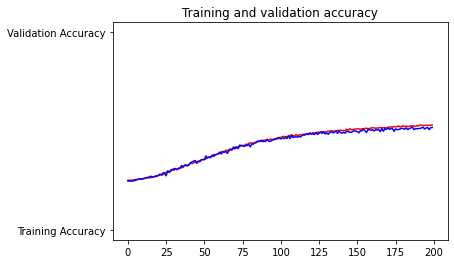

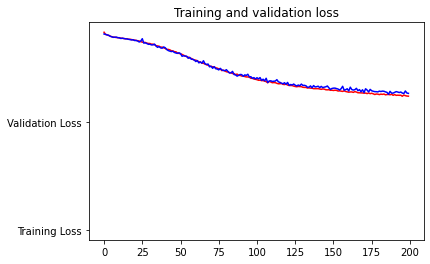

In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [12]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
